# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Откройте и изучите файл

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, \
precision_score, recall_score, f1_score, ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv('/datasets/users_behavior.csv')

df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [ ]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


In [ ]:
df.loc[df['is_ultra'] == 1, 'is_ultra'].count() / df['is_ultra'].shape[0]

0.30647168637212197

Порядка 30% клиентов из выборки имеют тариф ultra

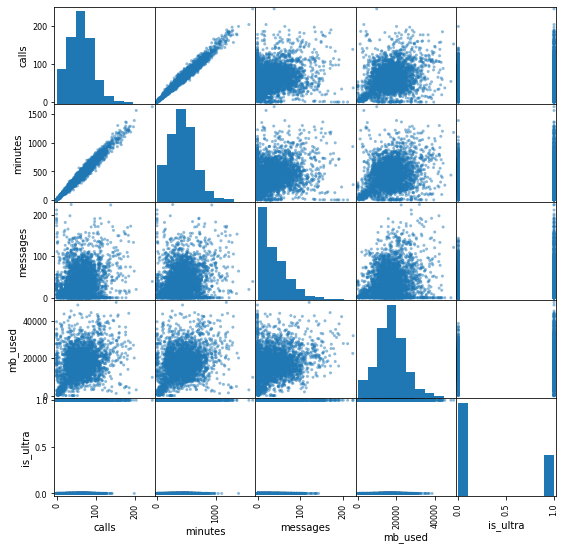

In [ ]:
pd.plotting.scatter_matrix(df, figsize=(9, 9));

## Разбейте данные на выборки

Разделим исходные данные на обучающую, валидационную и тестовую выборки в соотношении 3:1:1 (60%, 20%, 20%)

Для этого сначала разделим данные в отношении 3:2, в потом вторую часть поделим пополам (на валидационную и тестовую)

In [ ]:
df_train, df_temp = train_test_split(df, test_size=0.4, random_state=12345, stratify=df['is_ultra'])

In [ ]:
#checking the size of df_train
df_train.shape[0] / df.shape[0]

0.5998755444928439

In [ ]:
#divide df_temp at equal datasets (valid and test)
df_valid, df_test = train_test_split(df_temp, test_size=0.5, random_state=12345, stratify=df_temp['is_ultra'])

In [ ]:
#checking the size of df_test
df_test.shape[0] / df.shape[0]

0.2000622277535781

In [ ]:
#checking the size of df_valid
df_valid.shape[0] / df.shape[0]

0.2000622277535781

In [ ]:
#деление на признаки и целевые признаки для обучающего набора данных
features_train = df_train.drop(columns='is_ultra')
target_train = df_train['is_ultra']

features_train.head()

,calls,minutes,messages,mb_used
2294,76.0,484.49,11.0,22454.35
1759,51.0,328.88,24.0,20511.93
529,105.0,705.05,18.0,22130.74
1599,19.0,135.52,48.0,13152.50
1868,28.0,159.55,0.0,14780.00


In [ ]:
#деление на признаки и целевые признаки для валидационного набора данных
features_valid = df_valid.drop(columns='is_ultra')
target_valid = df_valid['is_ultra']

features_valid.head()

,calls,minutes,messages,mb_used
78,73.0,562.27,11.0,17589.08
2024,27.0,147.66,39.0,7545.04
2907,164.0,1132.94,16.0,5998.50
680,126.0,848.92,57.0,19967.05
3078,13.0,60.13,22.0,29289.67


In [ ]:
#деление на признаки и целевые признаки для тестового набора данных
features_test = df_test.drop(columns='is_ultra')
target_test = df_test['is_ultra']

features_test.head()

,calls,minutes,messages,mb_used
3113,66.0,460.33,0.0,15402.88
1459,38.0,312.02,66.0,21645.98
2791,60.0,445.03,117.0,10231.26
3141,6.0,32.49,12.0,1444.15
2380,63.0,472.74,40.0,23709.86


In [ ]:
df_train.loc[df_train['is_ultra'] == 1, 'is_ultra'].count() / df_train['is_ultra'].shape[0]

0.3065352697095436

In [ ]:
df_valid.loc[df_valid['is_ultra'] == 1, 'is_ultra'].count() / df_valid['is_ultra'].shape[0]

0.30637636080870917

In [ ]:
df_test.loc[df_test['is_ultra'] == 1, 'is_ultra'].count() / df_test['is_ultra'].shape[0]

0.30637636080870917

## Исследуйте модели

### Модель решающее дерево

Посмотрим несколько моделей решающего дерева с максимальной глубиной от 1 до 5 и выберем наилучшую модель на валидационной выборке

In [ ]:
best_accuracy = 0
best_depth = 0
accuracy_train = []
accuracy_valid = []
for depth in range(1,50):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model.fit(features_train, target_train)
    #predictions_train = model.predict(features_train)
    #predictions_valid = model.predict(features_valid)
    result_train = model.score(features_train, target_train)
    result_valid = model.score(features_valid, target_valid)
    #print(f'Глубина дерева {depth} точность на обучающей выборке {result_train}')
    accuracy_train.append(result_train)
    #print(f'Глубина дерева {depth} точность на валидационной выборке {result_valid}')
    accuracy_valid.append(result_valid)
    #print('---------')
    if result_valid > best_accuracy:
        best_accuracy = result_valid
        best_depth = depth

In [ ]:
print(f'Лучшая точность на валидационной выборке: {best_accuracy}')
print(f'Глубина дерева при этом: {best_depth}')

Лучшая точность на валидационной выборке: 0.80248833592535
Глубина дерева при этом: 8


Покажем на графике изменение точности модели на обучающей и валидационных выборках в зависимости от глубины дерева

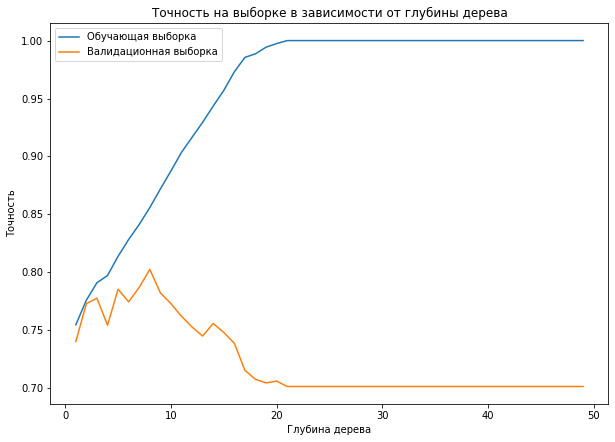

In [ ]:
fig, ax = plt.subplots()
x=range(1,50)
y1=accuracy_train
y2=accuracy_valid

ax.plot(x, y1, label= 'Обучающая выборка');
ax.plot(x, y2, label='Валидационная выборка');

ax.legend()

fig.set_figheight(7)
fig.set_figwidth(10)
ax.set_title('Точность на выборке в зависимости от глубины дерева');
ax.set(xlabel='Глубина дерева', ylabel='Точность');

In [ ]:
features_train.head()

,calls,minutes,messages,mb_used
2294,76.0,484.49,11.0,22454.35
1759,51.0,328.88,24.0,20511.93
529,105.0,705.05,18.0,22130.74
1599,19.0,135.52,48.0,13152.50
1868,28.0,159.55,0.0,14780.00


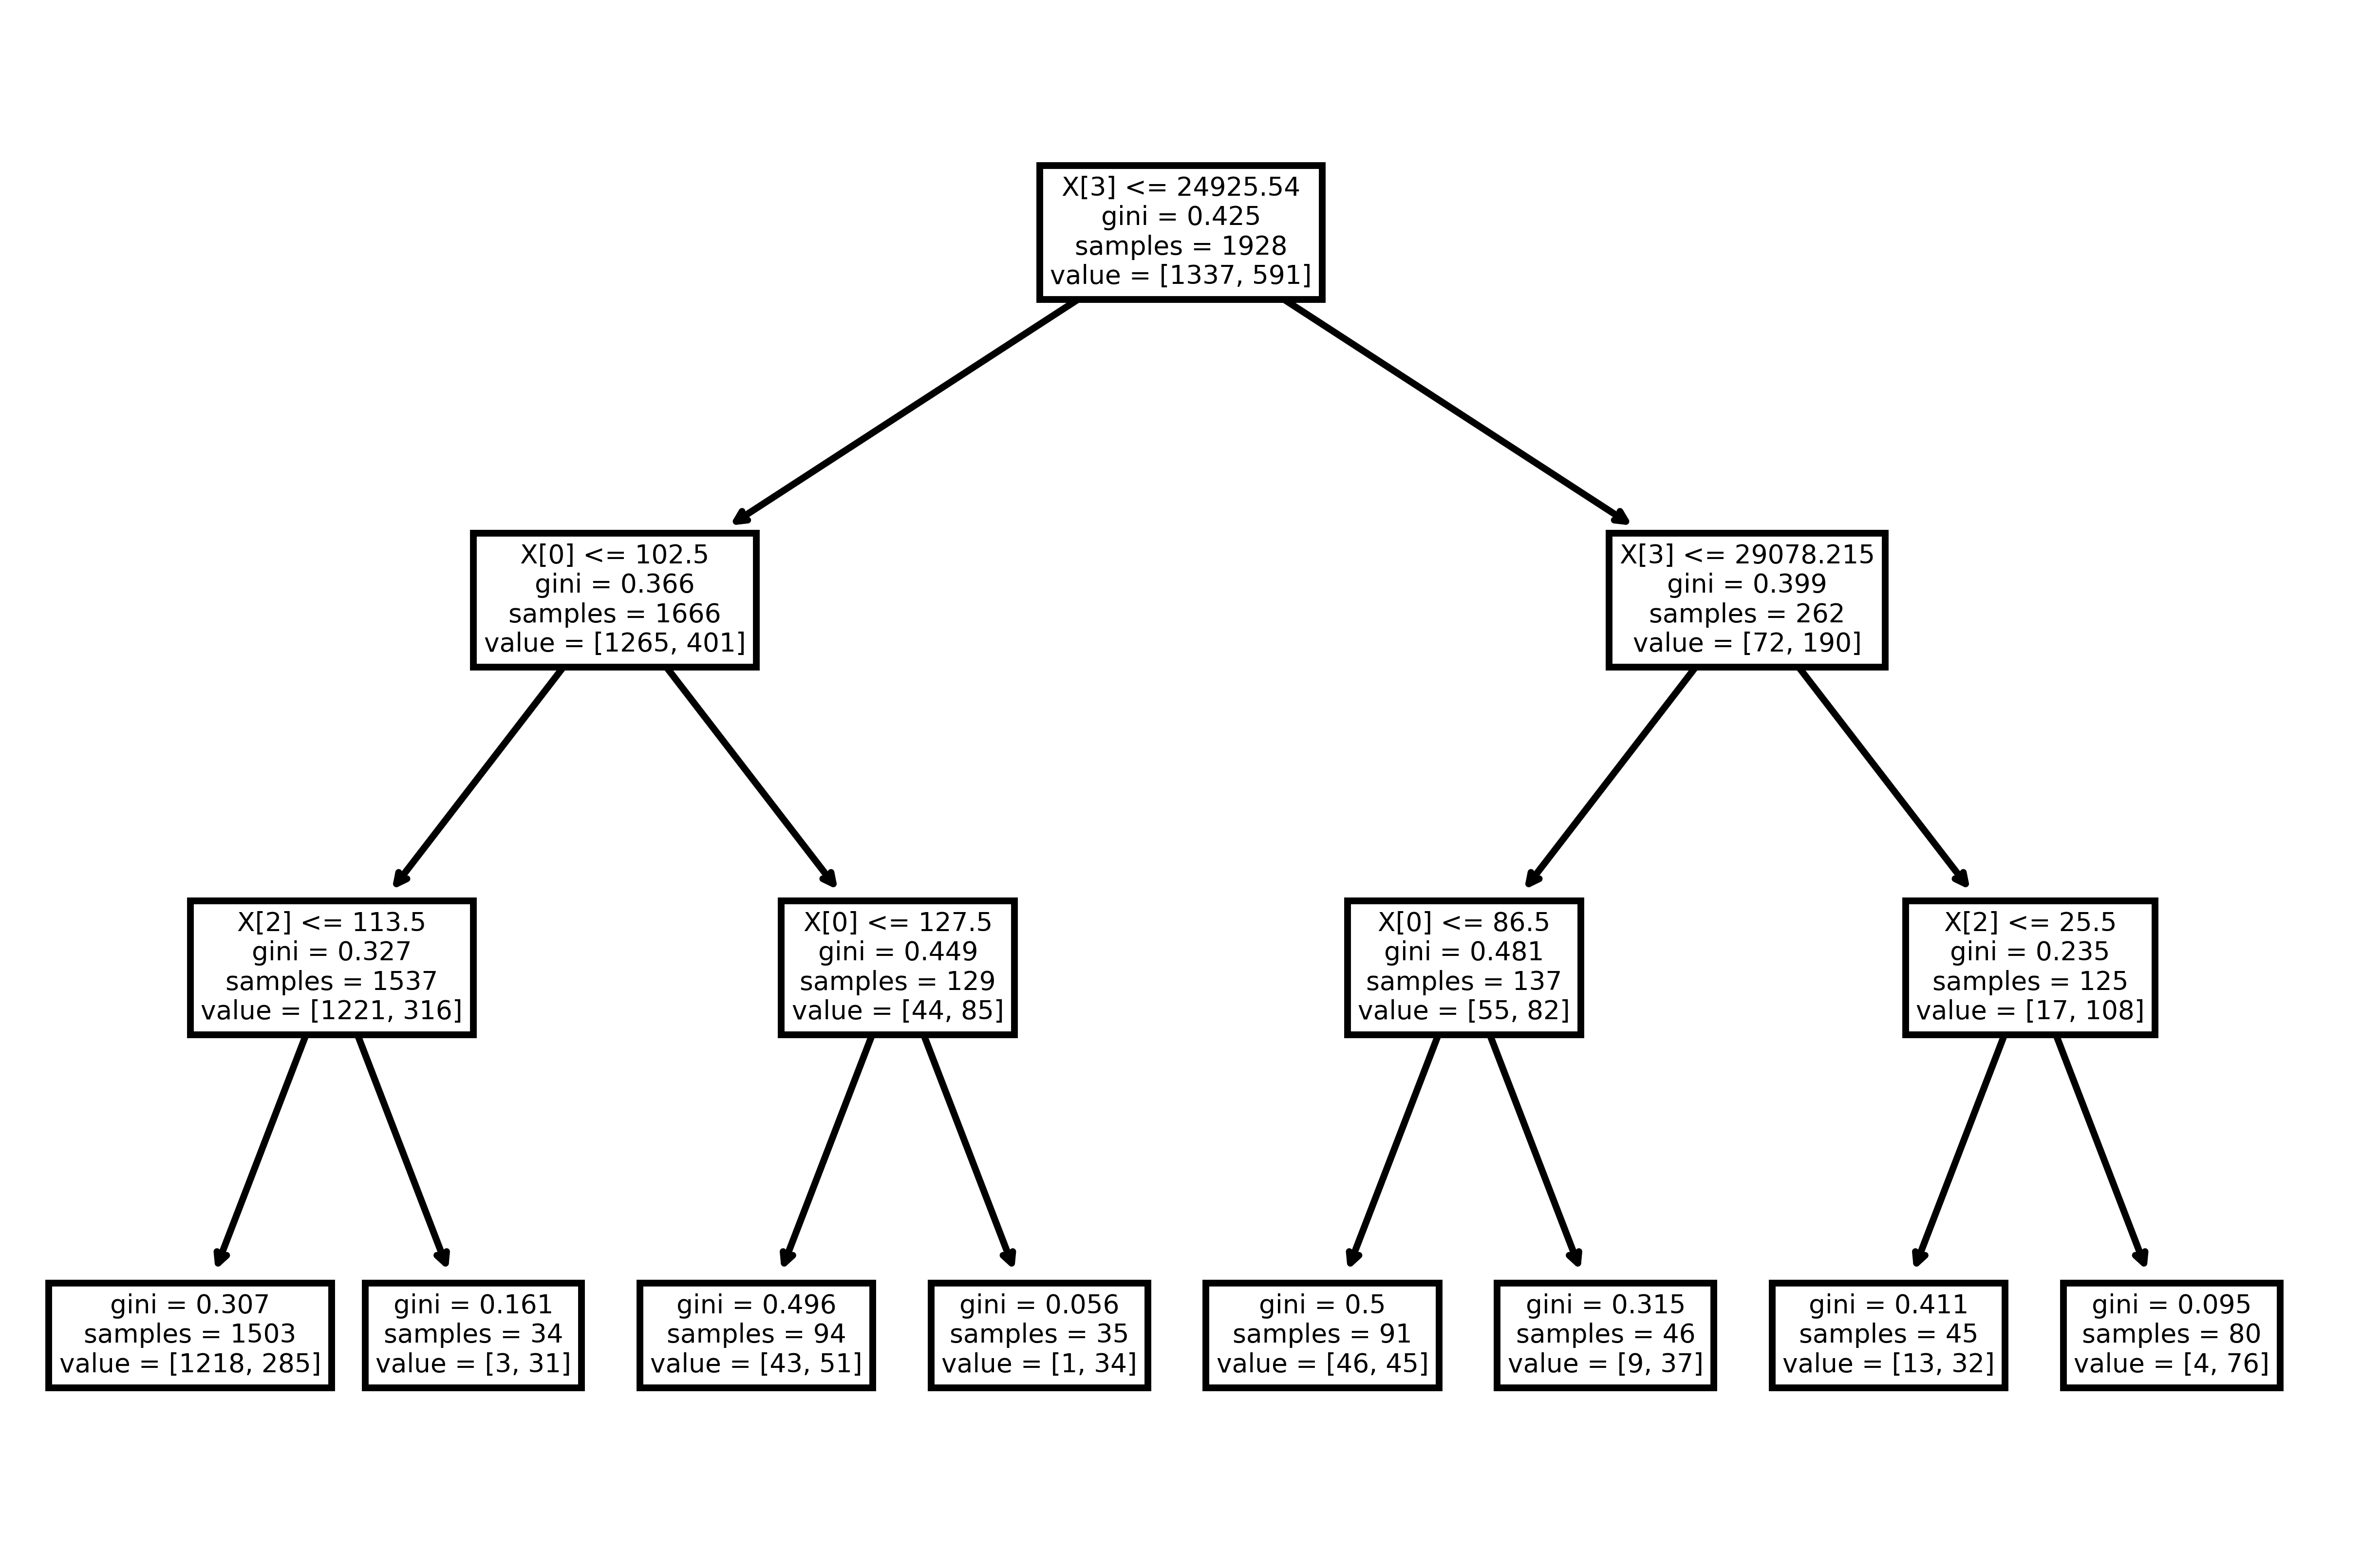

In [ ]:
best_model_tree = DecisionTreeClassifier(max_depth=3, random_state=12345)
best_model_tree.fit(features_train, target_train)

plt.figure(dpi=1000)
tree.plot_tree(best_model_tree); 

Вывод по модели Решающее дерево:
- наибольшей точностью на валидационной выборке обладает модель с глубиной дерева 3 (78.5%), при этом точность обучения на обучающей выборке составила (80.7%). Это не самая высока точность на обучающей выборке, однако, видим что при глубине дерева больше 3 возникает переобучение модели
- выбираем глубину дерева 3

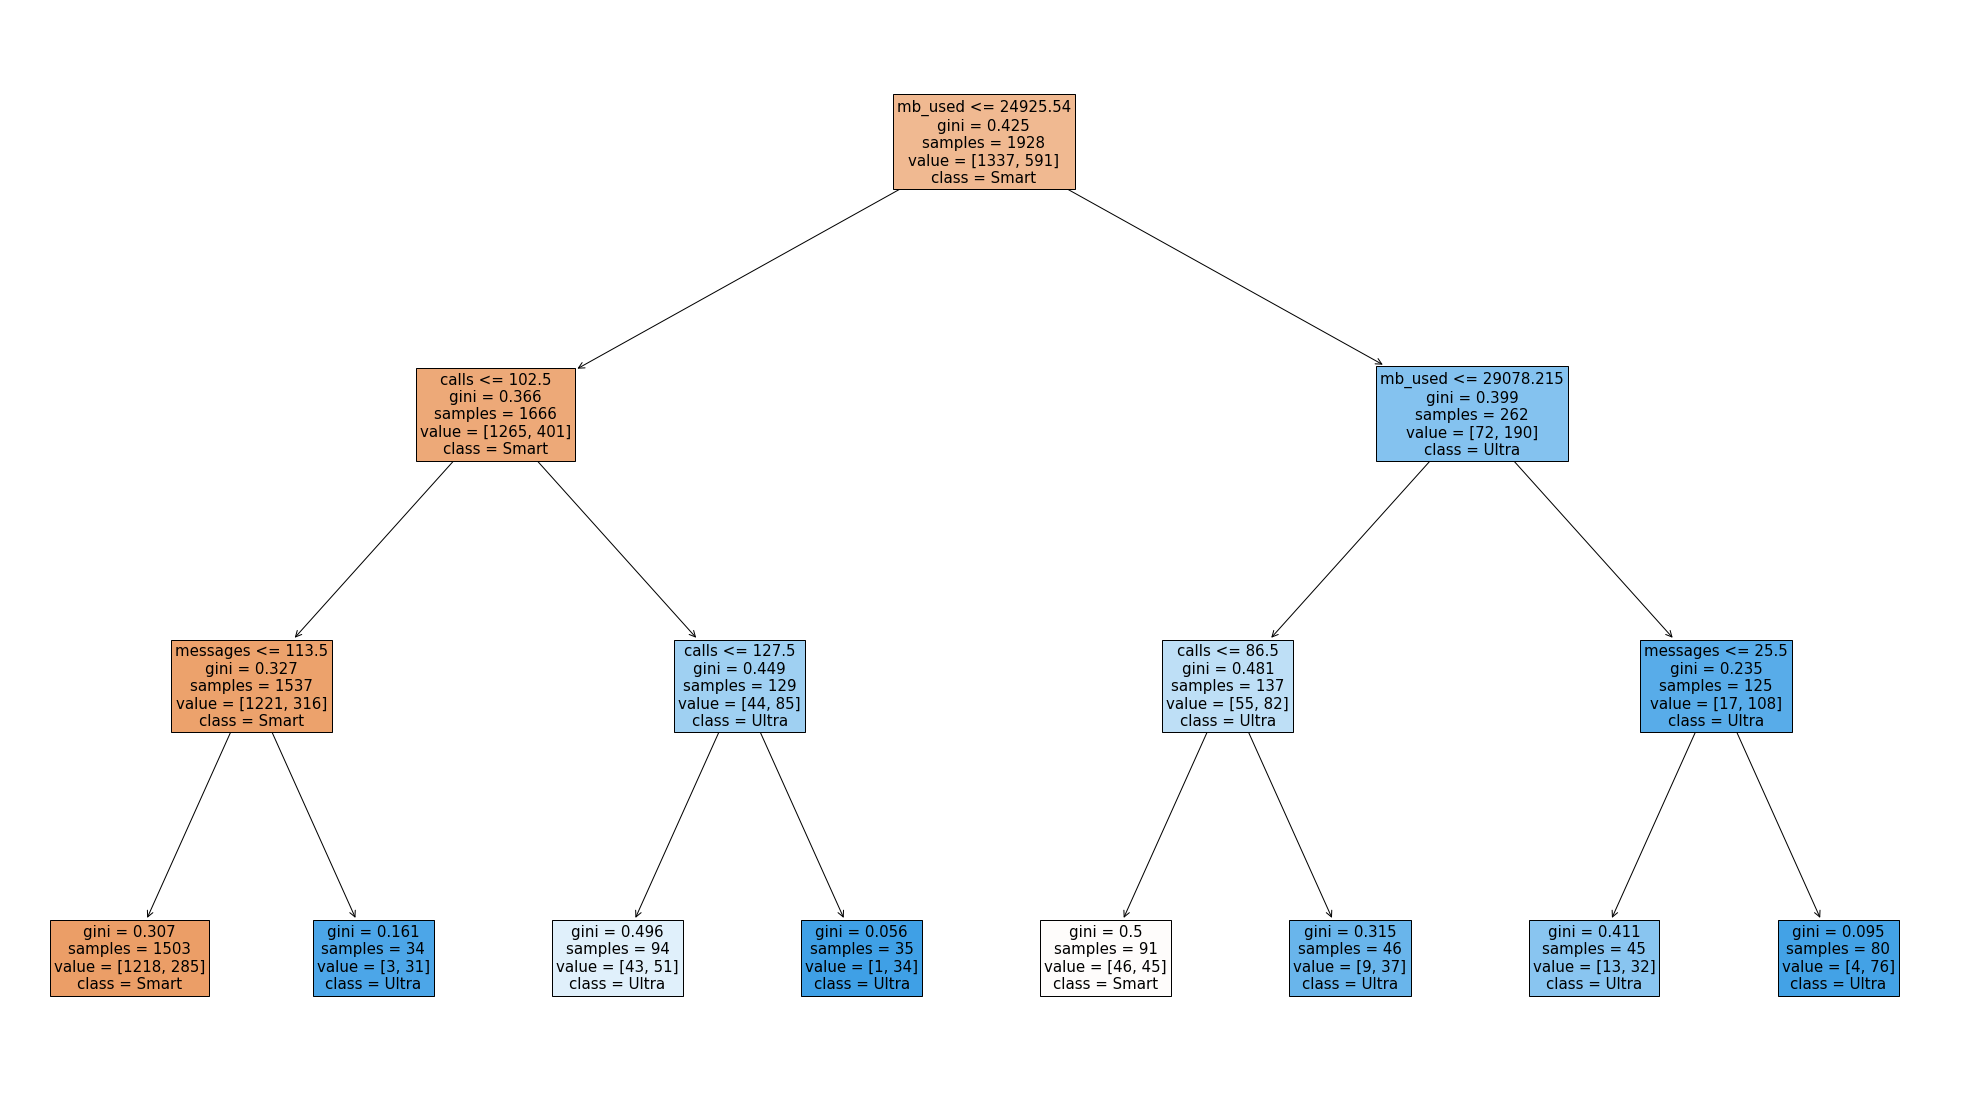

In [ ]:
fig = plt.figure(figsize=(35,20))
tree.plot_tree(best_model_tree, 
                   feature_names=features_train.columns.values, 
                   class_names=['Smart','Ultra'],
                   filled=True,
                   fontsize = 15,
                   max_depth = 3);

### Модель Случайный лес

Будем изменять число деревьев от 10 до 50 с шагом 10, а также в каждом цикле будем изменять глубину дерева от 1 до 5

In [ ]:
%%time
best_accuracy = 0
best_depth = 0
best_est = 0
accuracy_train = []
accuracy_valid = []
for est in range(10,101,10):
    for depth in range(1,6):
        model = RandomForestClassifier(max_depth=depth, random_state=12345, n_estimators = est)
        model.fit(features_train, target_train)
        result_train = model.score(features_train, target_train)
        result_valid = model.score(features_valid, target_valid)
        if result_valid > best_accuracy:
            best_accuracy = result_valid
            best_depth = depth
            best_est = est
            accuracy_train_out = result_train

CPU times: user 7.01 s, sys: 76 ms, total: 7.09 s
Wall time: 7.1 s


In [ ]:
print(f'Лучшая точность на валидационной выборке: {best_accuracy}')
print(f'При этом точность на обучающей выборке составила {accuracy_train_out}')
print(f'Глубина дерева при этом: {best_depth}')
print(f'Количество деревьев: {best_est}')

Лучшая точность на валидационной выборке: 0.8009331259720062
При этом точность на обучающей выборке составила 0.821058091286307
Глубина дерева при этом: 5
Количество деревьев: 50


Вывод по модели Случайный лес:
- наибольшей точностью на валидационной выборке обладает модель с количеством деревьев 50 и глубиной дерева 5 (80.1%), при этом точность обучения на обучающей выборке составила (82.1%)

### Модель Логистическая регрессия

In [ ]:
best_accuracy = 0
best_iter = 0
for i in range(100, 1001, 100):
    model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=i)
    model.fit(features_train, target_train)
    result_train = model.score(features_train, target_train)
    result_valid = model.score(features_valid, target_valid)
    print(f'Количество итераций: {i}')
    print(f'Текущая точность модели на обучающей выборке: {result_train}')
    print(f'Текущая точность модели на Валидационной выборке: {result_valid}')
    print('----------')
    if result_valid > best_accuracy:
        best_accuracy = result_valid
        best_iter = i

Количество итераций: 100
Текущая точность модели на обучающей выборке: 0.7510373443983402
Текущая точность модели на Валидационной выборке: 0.7387247278382582
----------
Количество итераций: 200
Текущая точность модели на обучающей выборке: 0.7510373443983402
Текущая точность модели на Валидационной выборке: 0.7387247278382582
----------
Количество итераций: 300
Текущая точность модели на обучающей выборке: 0.7510373443983402
Текущая точность модели на Валидационной выборке: 0.7387247278382582
----------
Количество итераций: 400
Текущая точность модели на обучающей выборке: 0.7510373443983402
Текущая точность модели на Валидационной выборке: 0.7387247278382582
----------
Количество итераций: 500
Текущая точность модели на обучающей выборке: 0.7510373443983402
Текущая точность модели на Валидационной выборке: 0.7387247278382582
----------
Количество итераций: 600
Текущая точность модели на обучающей выборке: 0.7510373443983402
Текущая точность модели на Валидационной выборке: 0.73872472

In [ ]:
print(f'Точность на валидационной выборке: {best_accuracy}')
print(f'Количество итераций при этом: {best_iter}')

Точность на валидационной выборке: 0.7387247278382582
Количество итераций при этом: 100


**Выводы**:
- Видим, что в данной задаче при числе итераций больше 100 точность модели Логистическая регрессия не повышается;
- Точность модели Логистическая регрессия на обучающей выборке составила 71.3%, а на валидационной - 71.1%

### Выбор самой точной модели

Выпишем точности моделей на валидационных  и обучающих выборках:

- Решающее дерево: наибольшей точностью на валидационной выборке обладает модель с глубиной дерева 3 (78.5%), при этом точность обучения на обучающей выборке составила (80.7%)

- Случайный лес: наибольшей точностью на валидационной выборке обладает модель с количеством деревьев 40 и глубиной дерева 5 (79.5%), при этом точность обучения на обучающей выборке составила (82.6%)

- Логистическая регрессия: точность модели Логистическая регрессия на обучающей выборке составила 71.3%, а на валидационной - 71.1%

Таким образом, видим, что самая высокая точность на обучающей выборке у модели Случайный лес с количеством деревьев 40 и глубиной дерева 5. Эту модель выбираем в качестве финальной и проверяем на тестовой выборке

## Проверьте модель на тестовой выборке

Модель Случайный лес с количеством деревьев 40 и глубиной дерева 5

In [ ]:
model = RandomForestClassifier(max_depth=5, random_state=12345, n_estimators = 50)
model.fit(features_train, target_train)
model.score(features_test, target_test)

0.8195956454121306

Посмотрим, вырастет ли точность модели, если мы её дообучим еще и на валидационных данных

In [ ]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 2294 to 2134
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     1928 non-null   float64
 1   minutes   1928 non-null   float64
 2   messages  1928 non-null   float64
 3   mb_used   1928 non-null   float64
dtypes: float64(4)
memory usage: 75.3 KB


In [ ]:
features_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 78 to 2434
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     643 non-null    float64
 1   minutes   643 non-null    float64
 2   messages  643 non-null    float64
 3   mb_used   643 non-null    float64
dtypes: float64(4)
memory usage: 25.1 KB


In [ ]:
features_train_valid = features_train.merge(features_valid, how='outer')

In [ ]:
features_train_valid.head()

,calls,minutes,messages,mb_used
0,76.0,484.49,11.0,22454.35
1,51.0,328.88,24.0,20511.93
2,105.0,705.05,18.0,22130.74
3,19.0,135.52,48.0,13152.50
4,28.0,159.55,0.0,14780.00


In [ ]:
features_train_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2571 entries, 0 to 2570
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     2571 non-null   float64
 1   minutes   2571 non-null   float64
 2   messages  2571 non-null   float64
 3   mb_used   2571 non-null   float64
dtypes: float64(4)
memory usage: 100.4 KB


Объединение датасетов features_train and features_valid прошло успешно (1928 + 643 = 2571 строка)

In [ ]:
target_train_valid = pd.concat([target_train, target_valid], axis=0)

In [ ]:
target_train_valid.head()

2294    0
1759    0
529     1
1599    0
1868    0
Name: is_ultra, dtype: int64

In [ ]:
len(target_train_valid)

2571

Объединение датасетов target_train and target_valid прошло успешно (1928 + 643 = 2571 строка)

Обучим модель заново на датасете features_train_valid and target_train_valid

In [ ]:
model = RandomForestClassifier(max_depth=5, random_state=12345, n_estimators = 50)
model.fit(features_train_valid, target_train_valid)
predicted_test = model.predict(features_test)
model.score(features_test, target_test)

0.8273716951788491

Увеличив обучающий датасет, получилось увеличить точность модели с 78.4% до 79.2%. 
UPD: точность выросла до 82.6%
UPD2: точность выросла до 82.7%

**Вывод**
- точность выбранной модели Случайный лес на тестовой выборке составила 82.7%, что выше требуемых в задании 75%

In [ ]:
print(confusion_matrix(target_test, predicted_test))

[[429  17]
 [ 94 103]]


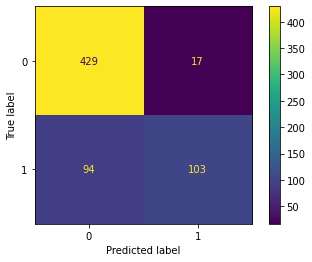

In [ ]:
cm = confusion_matrix(target_test, predicted_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = model.classes_)

disp.plot();

In [ ]:
print(f'Precision_score = {precision_score(target_test, predicted_test):.3f}')

Precision_score = 0.858


Модель имеет высокую точность (84 предсказанных положительных ответа из 100) действительно верные. Наша модель хорого научилась предсказывать

In [ ]:
print(f'Recall_score = {recall_score(target_test, predicted_test):.3f}')

Recall_score = 0.523


А вот полнота не такая высокая. Recall описывает, как хорошо модель разобралась в особенностях этого класса и распознала его. Посмотрим среднее гармоническое метрик точноть и полнота - f1

In [ ]:
print(f'F1_score = {f1_score(target_test, predicted_test):.3f}')

F1_score = 0.650


Чтобы понять много это или мало - нам надо проверить модель на адекватность и посмотреть каким будет значение f1_score у модели, которая предсказывает только 1 и модель которая предсказывает только 0 (0 в целевом признаке встречабтся чаще)

## (бонус) Проверьте модели на адекватность

Создадим Dummy Model которая предсказывает только 0

In [ ]:
model_0 = DummyClassifier(strategy="constant", constant=0)
model_0.fit(features_train_valid, target_train_valid)
predicted_0 = model_0.predict(features_test)
#predicted_0

In [ ]:
print(f'Accuracy_score = {accuracy_score(target_test, predicted_0):.3f}')

Accuracy_score = 0.694


Точность модели, которая постоянно предсказывает 0 - 70%. Это было очевидно :) так как у нас именно такое распределение целевого признака (70 на 30). Точность нашей модель RF 82.6% - значит она адекватная)

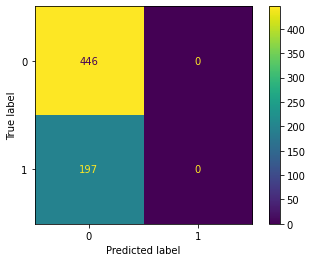

In [ ]:
cm = confusion_matrix(target_test, predicted_0)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = model.classes_)

disp.plot();

In [ ]:
precision_0 = 446 / (446+197)
precision_0 

0.6936236391912908

In [ ]:
recall_0 = 446 / 446
recall_0

1.0

In [ ]:
f1_0 = (2 * precision_0 * recall_0) / (precision_0 + recall_0)
f1_0

0.8191000918273645

Если считать, что цель предсказать 0 - то модель с 0 на выходе имеет f1_score 82% (Иначе f1_score не посчитать так как возникает ошибка 0 / 0). В этом случае можно ли сравнить этот f1 82% c f1 RF 65% и сказать, что модель имеет метрику хуже чем базовая модель?

Создадим Dummy Model которая предсказывает только 1

In [ ]:
model_1 = DummyClassifier(strategy="constant", constant=1)
model_1.fit(features_train_valid, target_train_valid)
predicted_1 = model_1.predict(features_test)
#predicted_1

In [ ]:
print(accuracy_score(target_test, predicted_1))

0.30637636080870917


In [ ]:
print(confusion_matrix(target_test, predicted_1))

[[  0 446]
 [  0 197]]


In [ ]:
print(f1_score(target_test, predicted_1))

0.46904761904761905
